### Questions

### Objectives
YWBAT
* compare and contrast multiple linear regression with linear regression
* interpret a linear regression equation
* interpret a lienar regression summary from statsmodels.api.ols

### Multiple Linear Regression Equation - Let's discuss this!

![](images/linreg.png)

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("sample_data.csv")
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,target
0,0.001821,-0.001319,0.005859,0.021955,-0.001948,-0.003966,0.009683,-0.004639,-0.008645,0.012157,0.002444,0.003559,675.850993
1,-0.004294,-0.001573,0.005556,0.004918,0.006706,-0.011201,0.005486,-0.005410,-0.014989,0.004123,0.000703,-0.001232,673.974262
2,-0.002046,-0.006717,0.012271,0.000074,-0.006127,0.003216,-0.012119,-0.005530,0.010074,0.003767,-0.001017,-0.001816,673.358685
3,0.002768,0.004881,-0.003340,-0.003184,-0.000521,0.003457,0.002025,-0.012864,0.002319,0.000966,0.005019,0.008129,674.325936
4,-0.004281,-0.002687,0.014785,-0.004035,0.009604,0.008402,0.001927,0.004632,-0.006889,0.005027,-0.007444,-0.010401,677.151990


### let's investigate our data first!

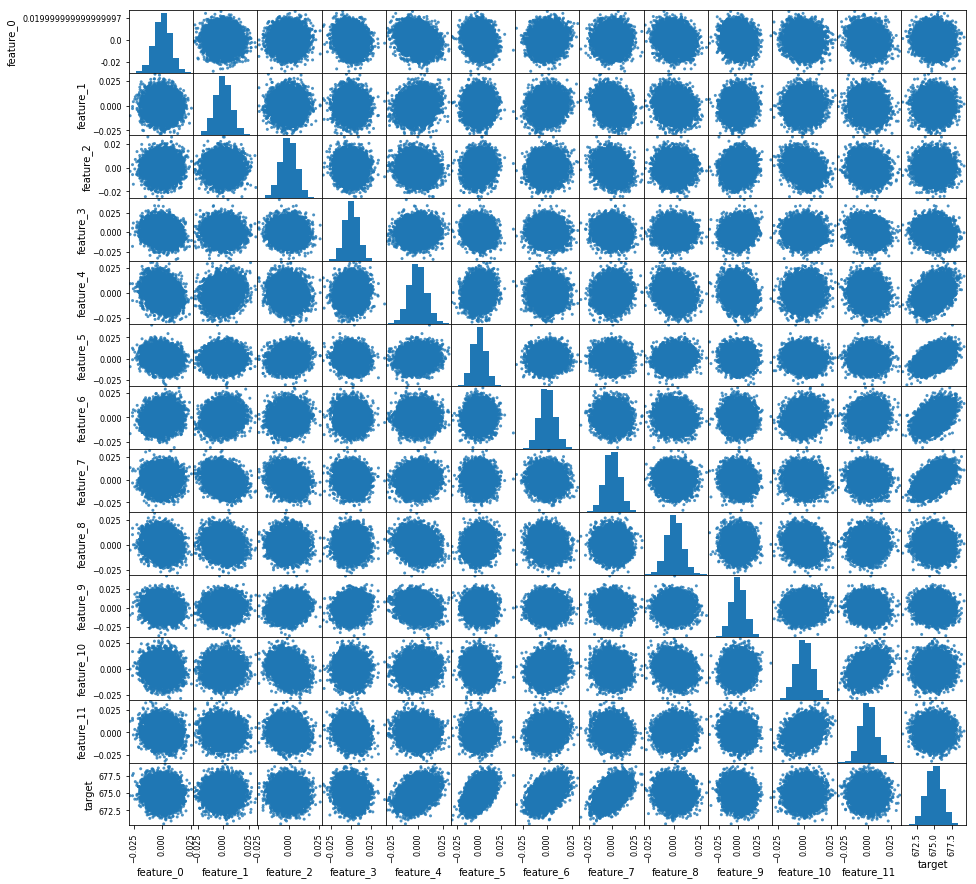

In [72]:
# let's use the scatter matrix functionality to view our data

pd.plotting.scatter_matrix(df, figsize=(15, 15), diagonal='hist', alpha=0.8)
plt.show()

### Let's look at a heatmap of the covariance!

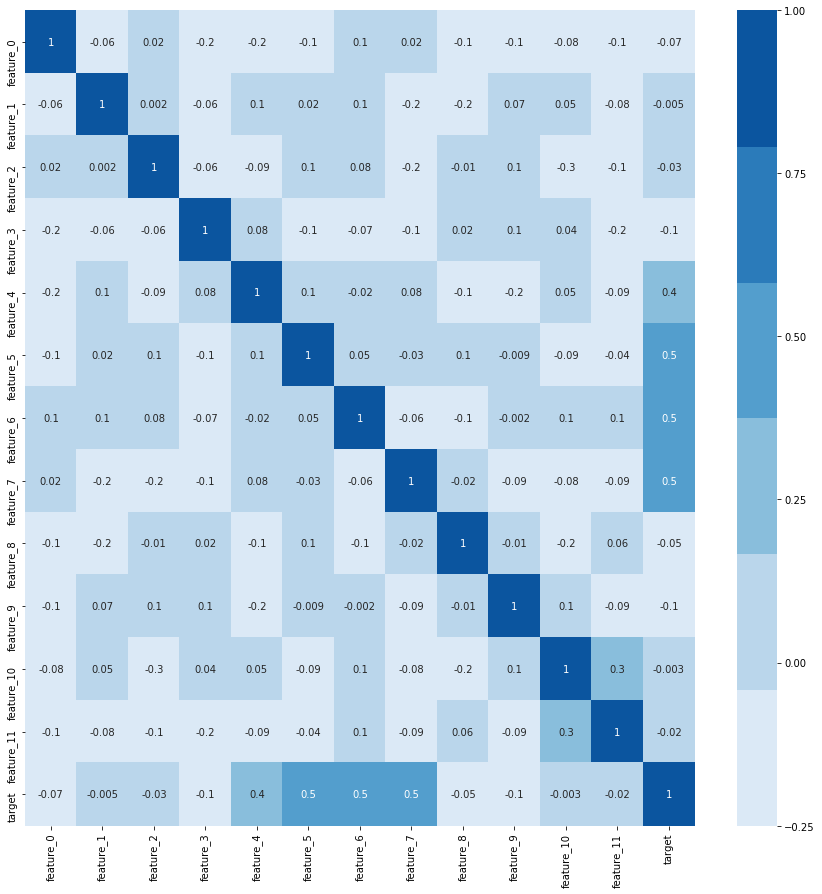

In [77]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='.1g', cmap=sns.color_palette('Blues'))
plt.show()

### how do we create a linreg model in statsmodels?

In [78]:
import statsmodels.api as sm

In [84]:
# split x and y data
y = df["target"]
x = df.drop("target", axis=1)

In [85]:
# we want an ols model with a constant
X = sm.add_constant(x)

In [86]:
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     3497.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        21:47:19   Log-Likelihood:                -7332.2
No. Observations:               10000   AIC:                         1.469e+04
Df Residuals:                    9987   BIC:                         1.478e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        675.0002      0.005   1.34e+05      0.000     674.990     675.010
feature_0     -2.3001      0.782     -2.939      0.003      -3.834      -0.766
feature_1     -0.0614      0.665     -0.092      0.926      -1.365       1.242
feature_2      0.9610      0.847      1.134      0.257      -0.700       2.622
feature_3     -0.6649      0.627     -1.061      0.289      -1.894       0.564
feature_4     38.4293      0.680     56.512      0.000      37.096      39.762
feature_5     69.9128      0.717     97.564      0.000      68.508      71.317
feature_6     70.1359      0.683    102.737      0.000      68.798      71.474
feature_7     73.8832      0.680    108.630      0.000      72.550      75.216
feature_8     -0.7158      0.700     -1.022      0.307      -2.089       0.657
feature_9     -0.5132      0.613     -0.838      0.402      -1.714       0.688
feature_10     1.5805      0.762      2.075      0.038       0.087       3.074
feature_11    -0.2789      0.694     -0.402      0.688      -1.639       1.081
==============================================================================
Omnibus:                        6.359   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.137
Skew:                           0.039   Prob(JB):                       0.0465
Kurtosis:                       2.907   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
linreg.params

const         675.000217
feature_0      -2.300050
feature_1      -0.061403
feature_2       0.961006
feature_3      -0.664922
feature_4      38.429258
feature_5      69.912759
feature_6      70.135916
feature_7      73.883159
feature_8      -0.715803
feature_9      -0.513224
feature_10      1.580495
feature_11     -0.278885
dtype: float64

### Running a straight Linear Regression Model with no pre-processing
* this is not to do anything more than to get a feel for the data
* I personally use this as a baseline
* Let's get through the rest

### Which features should be eliminated?
feature_1, feature_2, feature_3, feature_8, feature_9, feature_11

### Let's drop them and see what happens

In [88]:
# split x and y data
y = df["target"]
x = df.drop(["target", "feature_1", "feature_2", "feature_3", "feature_8", "feature_9", "feature_11"], axis=1)

In [89]:
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     6995.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        21:47:45   Log-Likelihood:                -7334.6
No. Observations:               10000   AIC:                         1.468e+04
Df Residuals:                    9993   BIC:                         1.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        675.0001      0.005   1.34e+05      0.000     674.990     675.010
feature_0     -1.9250      0.743     -2.589      0.010      -3.382      -0.468
feature_4     38.6051      0.633     60.964      0.000      37.364      39.846
feature_5     70.0120      0.697    100.455      0.000      68.646      71.378
feature_6     70.2640      0.663    105.993      0.000      68.965      71.563
feature_7     73.8705      0.630    117.262      0.000      72.636      75.105
feature_10     1.3017      0.685      1.900      0.057      -0.041       2.644
==============================================================================
Omnibus:                        6.382   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.160
Skew:                           0.039   Prob(JB):                       0.0460
Kurtosis:                       2.907   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
linreg.params

const         675.000141
feature_0      -1.925010
feature_4      38.605059
feature_5      70.012009
feature_6      70.264049
feature_7      73.870467
feature_10      1.301688
dtype: float64

### Let's remove feature_10 and see what happens

In [91]:
y = df["target"]
x = df.drop(["target", "feature_1", "feature_2", "feature_3", "feature_8", "feature_9", "feature_10", "feature_11"], axis=1)

In [92]:
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     8391.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        21:48:41   Log-Likelihood:                -7336.4
No. Observations:               10000   AIC:                         1.468e+04
Df Residuals:                    9994   BIC:                         1.473e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        675.0001      0.005   1.34e+05      0.000     674.990     675.010
feature_0     -2.0705      0.740     -2.799      0.005      -3.520      -0.621
feature_4     38.6622      0.633     61.115      0.000      37.422      39.902
feature_5     69.8532      0.692    100.943      0.000      68.497      71.210
feature_6     70.4337      0.657    107.212      0.000      69.146      71.721
feature_7     73.7785      0.628    117.447      0.000      72.547      75.010
==============================================================================
Omnibus:                        6.175   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.971
Skew:                           0.039   Prob(JB):                       0.0505
Kurtosis:                       2.909   Cond. No.                         158.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
linreg.params

const        675.000102
feature_0     -2.070477
feature_4     38.662194
feature_5     69.853174
feature_6     70.433673
feature_7     73.778547
dtype: float64

In [100]:
df_sub = df[["feature_0", "feature_4", "feature_5", "feature_6", "feature_7", "target"]]
corr = df_sub.corr()

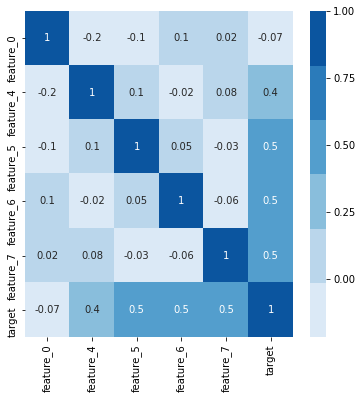

In [101]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, fmt='.1g', cmap=sns.color_palette('Blues'))
plt.show()

### let's look at a scatter matrix

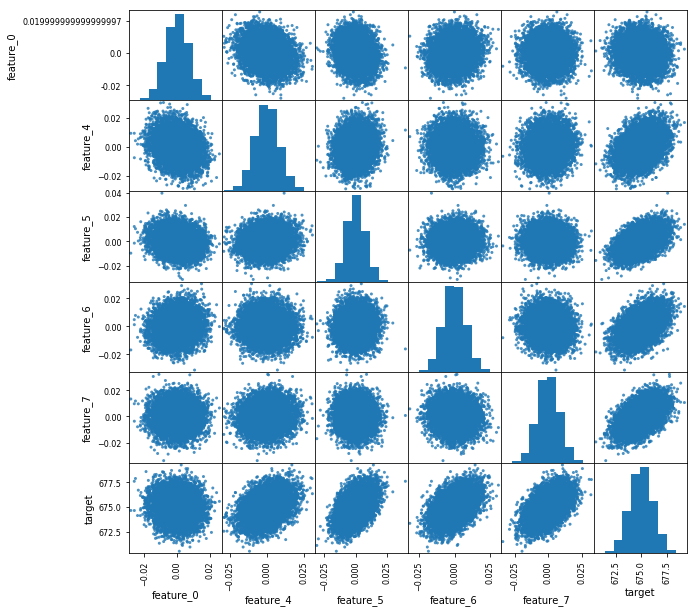

In [103]:
pd.plotting.scatter_matrix(df_sub, figsize=(10, 10), diagonal='hist', alpha=0.8)
plt.show()

### Let's remove feature_0

In [104]:
y = df_sub["target"]
x = df_sub.drop(["target", "feature_0"], axis=1)

In [105]:
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 1.048e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        21:53:07   Log-Likelihood:                -7340.3
No. Observations:               10000   AIC:                         1.469e+04
Df Residuals:                    9995   BIC:                         1.473e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        675.0002      0.005   1.34e+05      0.000     674.990     675.010
feature_4     39.0259      0.619     63.012      0.000      37.812      40.240
feature_5     70.0783      0.688    101.924      0.000      68.731      71.426
feature_6     70.1917      0.651    107.743      0.000      68.915      71.469
feature_7     73.7055      0.628    117.392      0.000      72.475      74.936
==============================================================================
Omnibus:                        6.116   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.907
Skew:                           0.038   Prob(JB):                       0.0522
Kurtosis:                       2.909   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
linreg.params

const        675.000179
feature_4     39.025898
feature_5     70.078325
feature_6     70.191720
feature_7     73.705471
dtype: float64

### Let's summarize our findings!

### Let's write out our equation as a function and calculate the error by hand!

In [116]:
def y_hat(x, params):
    intercept = params[0]
    coeffs = params[1:]
    y = intercept + np.dot(coeffs, x)
    return y

In [117]:
x_vals = df_sub.drop(["target", "feature_0"], axis=1).values
x_vals

array([[-0.00194841, -0.00396639,  0.00968283, -0.00463905],
       [ 0.00670621, -0.0112014 ,  0.00548644, -0.00540983],
       [-0.00612703,  0.00321635, -0.0121193 , -0.00553003],
       ...,
       [ 0.00219287, -0.00770772,  0.01271451, -0.00430559],
       [ 0.01961766,  0.00607355, -0.00779136,  0.00761396],
       [ 0.00247219, -0.00526851, -0.01251093, -0.00641914]])

In [120]:
y_vals = np.array([y_hat(x_i, linreg.params) for x_i in x_vals])
y_vals

array([674.98391375, 674.46328903, 673.72819465, ..., 675.12072162,
       676.20570204, 673.37616144])

In [123]:
def RMSE(y_true, y_pred):
    num = np.sum((y_true - y_pred)**2)
    den = np.sum((y_true - y_true.mean())**2)
    return 1 - num/den

In [124]:
RMSE(df["target"], y_vals)

0.8074696071007058